In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# get up to date model , for now model of 26 topics on 40k data is gotten.
from load_variables import load_data
processed_data, bow_corpus, id2word, lda_model = load_data()

In [35]:
dictionary = processed_data['body'].to_numpy().tolist()

In [36]:
dictionary[0:4]

[['सर्वोच्च',
  'अदालत',
  'प्रस्तावित',
  'न्यायाधीश',
  'अब्दुल',
  'अजिज',
  'मुसलमान',
  'शुक्रबार',
  'संसदीय',
  'सुनुवाइ',
  'समिति',
  'न्यायाधीश',
  'सुनुवाइ',
  'पुग',
  'नेपाली',
  'कांग्रेस',
  'सांसद',
  'रमेश',
  'लेखक',
  'मुद्',
  'चाप',
  'घटाउ',
  'प्रश्न',
  'प्रस्तावित',
  'न्यायाधीश',
  'अब्दुल',
  'अजिज',
  'रोचक',
  'जवाफ',
  'न्यायाधीश',
  'न्यायाधीश',
  'इजलास',
  'मुद्',
  'लाग्',
  'बजेसम्म',
  'कजलिस्ट',
  'लागे',
  'मुद्',
  'चाप',
  'घट्',
  'अल्छी',
  'गर्नुभएन',
  'पन्छाउ',
  'मेहनत',
  'त्यसरी',
  'मुद्',
  'घटाउन',
  'समिति',
  'जेष्ठ',
  'सदस्य',
  'हैसियत',
  'बैठक',
  'अध्यक्षता',
  'सांसद',
  'ज्ञानेन्द्र',
  'बहादुर',
  'कार्की',
  'अदालत',
  'मुद्',
  'संख्या',
  'छिटो',
  'टुङ्ग्याउन',
  'सोधे',
  'न्यायाधीश',
  'अजिज',
  'उदाहरणसहित',
  'जवाफ',
  'क्रोध',
  'लोभ',
  'मोह',
  'जीवन',
  'आयाम',
  'छाडेर',
  'परिवार',
  'समाज',
  'राष्ट्र',
  'परिवर्तन',
  'देश',
  'जरूरी',
  'न्यायालय',
  'क्षेत्र',
  'मुद्',
  'त्यसै',
  'कोरोना',
  'समस्या',
  

In [37]:
len(bow_corpus)

38947

In [38]:
# testing part for plotting documents in 2d:
topic_dis = [lda_model.get_document_topics(bow,minimum_probability=0.0) for bow in bow_corpus]

In [39]:
topic_probs = [[prob for _, prob in dist] for dist in topic_dis]

In [40]:
np_topic_probs = np.asarray(topic_probs)

In [41]:
topic_assignment = np_topic_probs.argmax(axis=1)
topic_assignment

array([ 3,  3,  3, ..., 14, 10, 20])

In [42]:
lda_model.num_topics

26

In [43]:
print(len(topic_probs))
print(len(topic_probs[0]))

38947
26


In [15]:
# for topic_prob in topic_probs:
#     val = max(topic_prob)
#     minval = min(topic_prob)
#     if val>0.99:
#         print(val)
#     if minval < 0.00001:
#         print(minval)

In [44]:
import umap
reducer = umap.UMAP(n_components=2,random_state=42)

In [45]:
embedding = reducer.fit_transform(topic_probs)

/home/avisek/work/final-year-project/topic_modeling/env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [46]:
print(embedding.shape)
print('--------------')
print(embedding)

(38947, 2)
--------------
[[ 9.295155   6.635925 ]
 [ 9.295208   6.6379704]
 [ 9.165322   5.840272 ]
 ...
 [ 7.357417  13.6418295]
 [10.659339  10.792896 ]
 [ 9.12187    8.816845 ]]


In [47]:
# For finding the minimum and maximum values.
print(np.min(embedding))
print(np.max(embedding))

-4.412747
23.798532


In [153]:
# color_array = plt.cm.viridis(np.linspace(0,1,26))
# color_array[0]

In [48]:
# color_assignment = color_array[topic_assignment]
# FOR NOW : 26 topics so 26 unique colors, ( generate this by LLM like ChatGPT )
unique_colors =  ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown',
                               'pink', 'gray', 'olive', 'cyan', 'lime', 'teal', 'indigo', 'maroon',
                               'navy', 'peru', 'orchid', 'turquoise', 'sienna', 'slateblue', 'darkred','gold']

In [49]:
len(unique_colors)

26

In [50]:
print(topic_assignment.shape)
print(topic_assignment)

(38947,)
[ 3  3  3 ... 14 10 20]


In [51]:
np.unique(topic_assignment).shape

(26,)

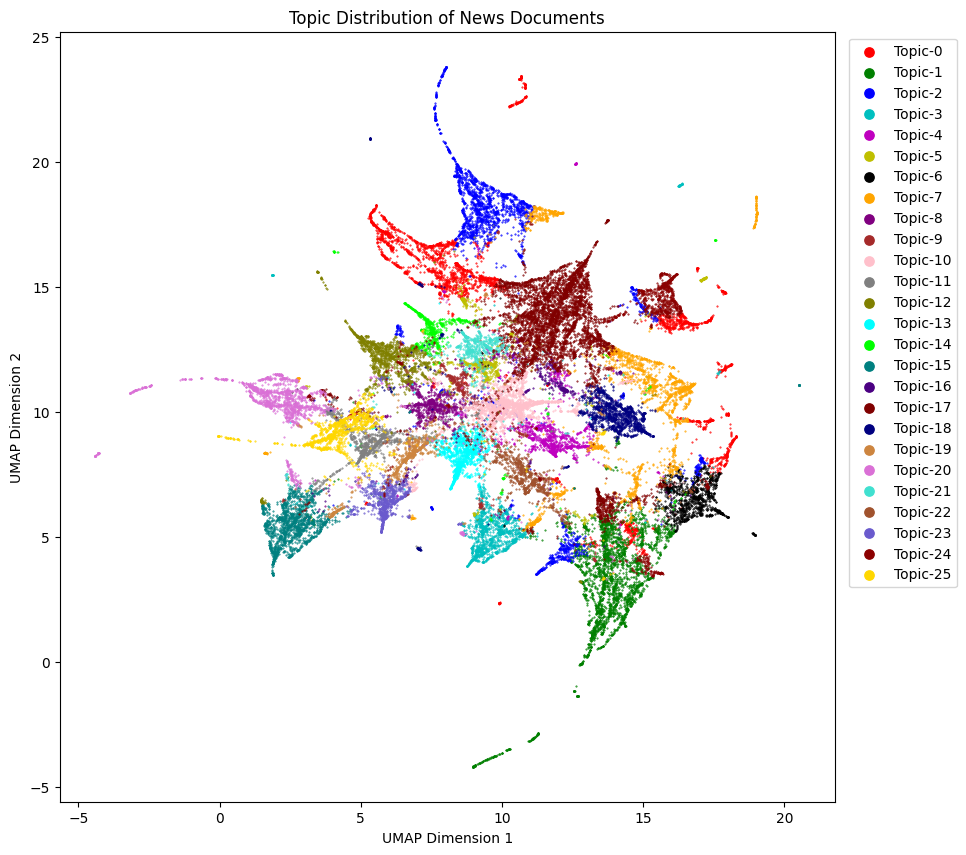

In [67]:
fig, ax = plt.subplots(figsize=(10,10))
for i in np.unique(topic_assignment):
    ix = np.where(topic_assignment==i)
    x_values = embedding[:, 0][ix]
    y_values = embedding[:, 1][ix]
    color = unique_colors[i]
    ax.scatter(x_values,y_values,s=0.2,c=color,label=f'Topic-{i}')
# ax.legend(markerscale=2)
ax.legend(bbox_to_anchor=(1.01, 1), markerscale=15)
plt.title('Topic Distribution of News Documents')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
# save image to folder
plt.savefig('./results/topic_distribution_of_40k_data.png',
            bbox_inches='tight')
plt.show()